# Machine Learning

In [1]:
# Make the project root folder accessible
from domino.utils.jupyter import notebook_init
notebook_init()

In [2]:
import os.path
import pandas as pd
np = pd.np

% matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

In [3]:
df = pd.read_csv(os.path.join('data', 'players.csv'))

In [4]:
players = df[['player_name', 'rating']].copy()

In [5]:
# Drop unnecessary columns
df = df.drop(['player_name', 'player_url', 'team', 'team_url', 'rank', 'rgn'], axis=1)

In [6]:
df.dtypes

aerialWonPerGame    float64
ap                    int64
assistTotal         float64
goal                float64
manOfTheMatch       float64
minsPlayed          float64
passSuccess         float64
rating              float64
redCard             float64
shotsPerGame        float64
yellowCard          float64
age                   int64
pos_AM(LR)             bool
pos_AM(L)              bool
pos_M(LR)              bool
pos_Midfielder         bool
pos_D(CL)              bool
pos_AM(CR)             bool
pos_M(R)               bool
pos_FW                 bool
pos_Forward            bool
pos_D(CR)              bool
pos_Goalkeeper         bool
pos_AM(CLR)            bool
pos_Defender           bool
pos_M(L)               bool
pos_M(C)               bool
pos_M(CLR)             bool
pos_M(CR)              bool
pos_D(L)               bool
pos_D(LR)              bool
pos_GK                 bool
pos_AM(C)              bool
pos_D(C)               bool
pos_AM(R)              bool
pos_DMC             

In [7]:
df.head()

,aerialWonPerGame,ap,assistTotal,goal,manOfTheMatch,minsPlayed,passSuccess,rating,redCard,shotsPerGame,...,pos_D(LR),pos_GK,pos_AM(C),pos_D(C),pos_AM(R),pos_DMC,pos_D(R),pos_AM(CL),pos_D(CLR),pos_M(CL)
0,0.2,31,16.0,26.0,13.0,2730.0,81.9,8.46,0.0,4.8,...,False,False,False,False,False,False,False,False,False,False
1,0.6,34,12.0,24.0,7.0,3057.0,80.9,8.43,0.0,3.6,...,False,False,False,False,False,False,False,False,False,False
2,0.9,21,10.0,19.0,5.0,1741.0,79.9,8.12,0.0,3.5,...,False,False,False,False,False,False,False,False,False,False
3,0.4,35,16.0,40.0,8.0,3150.0,73.1,8.01,0.0,3.9,...,False,False,False,False,False,False,False,False,False,False
4,1.6,36,11.0,35.0,8.0,3185.0,79.4,7.99,0.0,6.3,...,False,False,False,False,False,False,False,False,False,False


# Regression

Can the player score be predicted based on the player performance?

In [8]:
input_cols = [ col for col in df if col != 'rating' ]

In [9]:
X = df[input_cols].astype(float).as_matrix()

X

array([[  0.2,  31. ,  16. , ...,   0. ,   0. ,   0. ],
       [  0.6,  34. ,  12. , ...,   0. ,   0. ,   0. ],
       [  0.9,  21. ,  10. , ...,   0. ,   0. ,   0. ],
       ..., 
       [  2. ,   2. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0.7,   3. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0. ,   1. ,   0. , ...,   0. ,   0. ,   0. ]])

In [10]:
y = df.rating.as_matrix()

y

array([ 8.46,  8.43,  8.12,  8.01,  7.99,  7.65,  7.6 ,  7.52,  7.5 ,
        7.49,  7.44,  7.44,  7.37,  7.37,  7.37,  7.33,  7.33,  7.32,
        7.3 ,  7.28,  7.27,  7.27,  7.27,  7.25,  7.24,  7.24,  7.23,
        7.22,  7.22,  7.22,  7.22,  7.22,  7.21,  7.21,  7.2 ,  7.19,
        7.18,  7.17,  7.17,  7.16,  7.15,  7.15,  7.14,  7.14,  7.14,
        7.14,  7.14,  7.13,  7.12,  7.12,  7.12,  7.12,  7.12,  7.11,
        7.1 ,  7.1 ,  7.1 ,  7.09,  7.09,  7.09,  7.09,  7.09,  7.09,
        7.08,  7.08,  7.07,  7.07,  7.06,  7.06,  7.06,  7.06,  7.05,
        7.05,  7.05,  7.05,  7.04,  7.04,  7.04,  7.03,  7.03,  7.02,
        7.02,  7.02,  7.02,  7.01,  7.01,  7.01,  7.01,  7.  ,  7.  ,
        7.  ,  7.  ,  6.99,  6.99,  6.98,  6.98,  6.98,  6.98,  6.98,
        6.97,  6.97,  6.97,  6.97,  6.97,  6.96,  6.96,  6.95,  6.95,
        6.95,  6.94,  6.94,  6.94,  6.93,  6.93,  6.93,  6.93,  6.93,
        6.93,  6.92,  6.92,  6.92,  6.92,  6.92,  6.92,  6.91,  6.91,
        6.91,  6.91,

In [11]:
from sklearn.linear_model import LinearRegression

Most sklearn algorithms work in the same way:
* Instantiate the algorithm by calling the class constructor.
    * The parameters for the model are set in the constructor call.
* Call the fit method passing it the training samples (with their features) and, possibly, a target value

In [12]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
reg.intercept_, reg.coef_

(5.8491149480858065,
 array([  1.10099593e-01,   1.03473035e-02,   4.13093918e-02,
          6.72992849e-03,   5.77996074e-02,  -3.71771683e-05,
          6.67459080e-03,  -5.94741497e-02,   1.04594955e-01,
         -2.75628233e-03,  -3.64433845e-03,   2.03282625e-02,
         -5.70291047e-02,   3.20346014e-03,  -1.16908181e-01,
          1.70258991e-01,  -2.83948714e-03,   1.28539273e-02,
         -1.93383289e-01,  -1.93407365e-01,   1.91166314e-01,
         -3.88961197e-01,  -7.31981327e-03,  -1.54123160e-02,
         -1.41908552e-01,   1.61069573e-02,   3.54150917e-02,
          1.71751536e-01,   2.33606127e-01,   5.26072693e-02,
          2.98512269e-01,  -1.24548979e-01,   1.23701536e-01,
         -5.77567759e-02,   3.97674833e-03,   1.22121715e-01,
         -1.40431157e-01,   1.48051026e-01,   3.77342773e-02]))

In [14]:
predictions = pd.concat(
    [
        players, 
        pd.Series(reg.predict(X), name='predicted_score')
    ], 
    axis=1
)

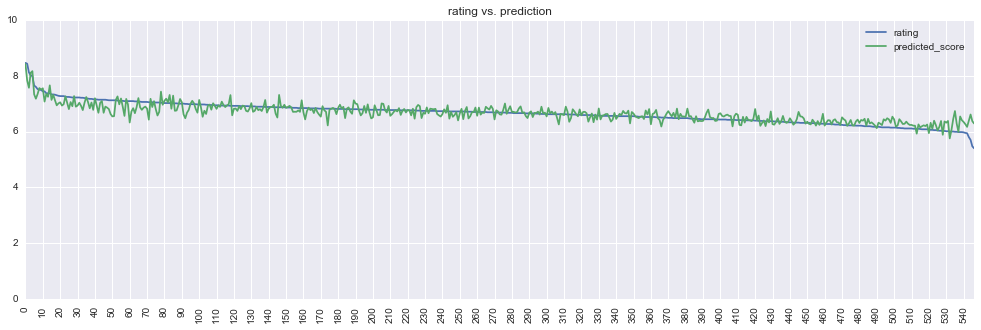

In [15]:
predictions.plot(
    figsize=(17, 5), ylim=(0, 10), xticks=players.index[::10], use_index=True, rot=90,
    title='rating vs. prediction'
)

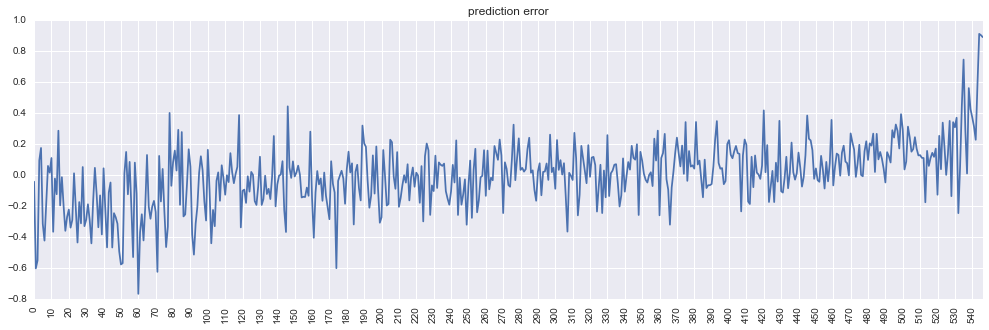

In [16]:
(predictions.predicted_score - predictions.rating).plot(
    figsize=(17, 5), xticks=players.index[::10], use_index=True, rot=90,
    title='prediction error'
)

# Classification

Can a player be classified by its role in the team based only on its performance?

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
df.columns

Index(['aerialWonPerGame', 'ap', 'assistTotal', 'goal', 'manOfTheMatch',
       'minsPlayed', 'passSuccess', 'rating', 'redCard', 'shotsPerGame',
       'yellowCard', 'age', 'pos_AM(LR)', 'pos_AM(L)', 'pos_M(LR)',
       'pos_Midfielder', 'pos_D(CL)', 'pos_AM(CR)', 'pos_M(R)', 'pos_FW',
       'pos_Forward', 'pos_D(CR)', 'pos_Goalkeeper', 'pos_AM(CLR)',
       'pos_Defender', 'pos_M(L)', 'pos_M(C)', 'pos_M(CLR)', 'pos_M(CR)',
       'pos_D(L)', 'pos_D(LR)', 'pos_GK', 'pos_AM(C)', 'pos_D(C)', 'pos_AM(R)',
       'pos_DMC', 'pos_D(R)', 'pos_AM(CL)', 'pos_D(CLR)', 'pos_M(CL)'],
      dtype='object')

In [19]:
output_cols = [col for col in df if col.startswith('pos_')]
input_cols = [col for col in df if col not in output_cols]

In [20]:
X = df[input_cols].as_matrix()
y = df[output_cols].as_matrix()

In [21]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [22]:
clf.score(X, y)

1.0

Score is 1.0 because DecisionTreeClassifiers have really high accuracies with the training data. <br />
We must use CrossValidation to get the correct score

In [23]:
from sklearn.cross_validation import KFold

In [24]:
kfold = KFold(len(X), n_folds=5)
scores = []

for train, test in kfold:
    clf = DecisionTreeClassifier()
    clf.fit(X[train], y[train])
    
    scores.append(clf.score(X[test], y[test]))
    
print(scores)
print(sum(scores) / len(scores))

[0.19090909090909092, 0.23636363636363636, 0.24770642201834864, 0.21100917431192662, 0.19266055045871561]
0.215729774812


The accuracy is really low. We must fine-tune the data in order to improve the model

For example, the target values are very diversified adding no meaning whatsoever

In [25]:
output_cols

['pos_AM(LR)',
 'pos_AM(L)',
 'pos_M(LR)',
 'pos_Midfielder',
 'pos_D(CL)',
 'pos_AM(CR)',
 'pos_M(R)',
 'pos_FW',
 'pos_Forward',
 'pos_D(CR)',
 'pos_Goalkeeper',
 'pos_AM(CLR)',
 'pos_Defender',
 'pos_M(L)',
 'pos_M(C)',
 'pos_M(CLR)',
 'pos_M(CR)',
 'pos_D(L)',
 'pos_D(LR)',
 'pos_GK',
 'pos_AM(C)',
 'pos_D(C)',
 'pos_AM(R)',
 'pos_DMC',
 'pos_D(R)',
 'pos_AM(CL)',
 'pos_D(CLR)',
 'pos_M(CL)']

By ommitting the parenthesis part we get less values

In [26]:
sorted(
    {
        col[:col.index('(')] if '(' in col else col
        for col in output_cols
    }
)

['pos_AM',
 'pos_D',
 'pos_DMC',
 'pos_Defender',
 'pos_FW',
 'pos_Forward',
 'pos_GK',
 'pos_Goalkeeper',
 'pos_M',
 'pos_Midfielder']

Some of those are repeated. Just retrieving the first letter of the position should be enough

In [27]:
from collections import defaultdict

output_cols_translate = defaultdict(list)
for col in output_cols:
    output_cols_translate[col[:5]].append(col)
    
output_cols_translate = dict(output_cols_translate)
output_cols_translate

{'pos_A': ['pos_AM(LR)',
  'pos_AM(L)',
  'pos_AM(CR)',
  'pos_AM(CLR)',
  'pos_AM(C)',
  'pos_AM(R)',
  'pos_AM(CL)'],
 'pos_D': ['pos_D(CL)',
  'pos_D(CR)',
  'pos_Defender',
  'pos_D(L)',
  'pos_D(LR)',
  'pos_D(C)',
  'pos_DMC',
  'pos_D(R)',
  'pos_D(CLR)'],
 'pos_F': ['pos_FW', 'pos_Forward'],
 'pos_G': ['pos_Goalkeeper', 'pos_GK'],
 'pos_M': ['pos_M(LR)',
  'pos_Midfielder',
  'pos_M(R)',
  'pos_M(L)',
  'pos_M(C)',
  'pos_M(CLR)',
  'pos_M(CR)',
  'pos_M(CL)']}

In [28]:
# Check if a player fulfills any of the columns associated with a position
for col, original_cols in output_cols_translate.items():
    df[col] = df[original_cols].any(axis=1)
    df = df.drop(original_cols, axis=1) # drop the old columns

In [29]:
# Get the new list of output columns
output_cols = list(output_cols_translate.keys())

output_cols

['pos_M', 'pos_D', 'pos_G', 'pos_F', 'pos_A']

In [30]:
# Thus, redefine y, since its values have changed
y = df[output_cols].as_matrix()

y

array([[False, False, False,  True,  True],
       [False, False, False,  True,  True],
       [ True, False, False,  True, False],
       ..., 
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False]], dtype=bool)

In [31]:
# Cross-validate to get the new scores
kfold = KFold(len(X), n_folds=5)
scores = []

for train, test in kfold:
    clf = DecisionTreeClassifier()
    clf.fit(X[train], y[train])
    
    scores.append(clf.score(X[test], y[test]))
    
print(scores)
print(sum(scores) / len(scores))

[0.47272727272727272, 0.40909090909090912, 0.49541284403669728, 0.33027522935779818, 0.33027522935779818]
0.407556296914


The score has doubled its value, but it's not enough. Why?

Because we're classifying multiple labels at the same time. <br />
But what if we only wanted to know when a given player plays in a certain position?

In [32]:
for output_col in output_cols:
    print(output_col)
    print('-' * 10)
    
    kfold = KFold(len(X), n_folds=5)
    scores = []
    
    y_tmp = df[output_col].as_matrix()

    for train, test in kfold:
        clf = DecisionTreeClassifier()
        clf.fit(X[train], y_tmp[train])

        scores.append(clf.score(X[test], y_tmp[test]))

    print(scores)
    print(sum(scores) / len(scores))
    print('-' * 10)
    print()

pos_M
----------
[0.63636363636363635, 0.62727272727272732, 0.61467889908256879, 0.54128440366972475, 0.39449541284403672]
0.562819015847
----------

pos_D
----------
[0.54545454545454541, 0.74545454545454548, 0.72477064220183485, 0.77981651376146788, 0.74311926605504586]
0.707723102585
----------

pos_G
----------
[0.97272727272727277, 0.99090909090909096, 0.97247706422018354, 0.99082568807339455, 0.80733944954128445]
0.946855713094
----------

pos_F
----------
[0.86363636363636365, 0.91818181818181821, 0.90825688073394495, 0.77981651376146788, 0.77064220183486243]
0.84810675563
----------

pos_A
----------
[0.84545454545454546, 0.81818181818181823, 0.83486238532110091, 0.74311926605504586, 0.47706422018348627]
0.743736447039
----------



Scores increase dramatically. 

Some positions are better defined by the performance of the player than others, however.

# Clustering

In [33]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(2)
X_transformed = pca.fit_transform(X)

cls = KMeans()
clusters = cls.fit_predict(X_transformed)

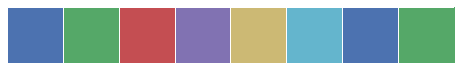

In [34]:
palette = sns.color_palette(n_colors=max(clusters) + 1) # create a color palette with N colors

sns.palplot(palette)

In [35]:
from matplotlib.colors import rgb2hex
palette = [
    rgb2hex(color) # convert color 3-tuples to hex values (ex. #00ff00)
    for color in palette
]

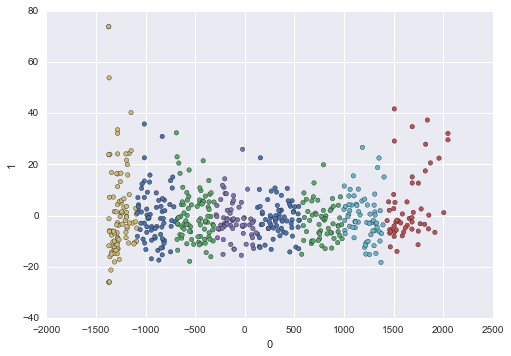

In [36]:
pd.DataFrame(X_transformed).plot.scatter(
    x=0, y=1, c=[palette[c] for c in clusters]
)

Let's analyize those clusters

In [37]:
group = df[input_cols].groupby(clusters)

clusters_data = group.apply(lambda subdf: subdf.describe().loc[['mean', 'std']])
clusters_stds = group.apply(lambda subdf: subdf.std() / df[input_cols].std())

In [38]:
for cluster in clusters_stds.index:
    most_relevant_cols = np.array(input_cols)[
        clusters_stds.loc[cluster].as_matrix().argsort()
    ][:3]
    
    subdf = clusters_data.loc[cluster, most_relevant_cols]
    
    print('-' * 40)
    print('Cluster %d:' % cluster)
    print('-' * 40)
    
    print(
        pd.concat(
            [
                subdf.loc['mean'] - 1.96 * subdf.loc['std'], 
                subdf.loc['mean'] + 1.96 * subdf.loc['std']
            ],
            axis=1
        )
    )
    
    print()

----------------------------------------
Cluster 0:
----------------------------------------
                     0           1
minsPlayed  250.320078  672.651350
ap            2.039748    7.674538
goal         -1.020703    1.849275

----------------------------------------
Cluster 1:
----------------------------------------
                       0            1
minsPlayed   1919.714155  2389.642988
ap             21.097811    27.866475
passSuccess    63.662807    91.555050

----------------------------------------
Cluster 2:
----------------------------------------
                      0            1
ap            30.631443    37.708179
minsPlayed  2698.147309  3357.701747
age           19.963704    34.753277

----------------------------------------
Cluster 3:
----------------------------------------
                         0            1
minsPlayed     1038.344185  1494.139686
ap               10.892754    17.236278
manOfTheMatch    -0.879519     1.589196

------------------------